# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Tema de la Semana: Árbol de Decisión y Bosque Aleatorio**

# **Parte - 1: Árbol de Decisión (Decision Tree)**

Lo relacionado a la teoría de este tema lo puedes estudiar en las siguientes referencias:

*	  Aurélien Géron (2023) Hands-on Machine Learning with scikit-learn, Keras and Tensor Flow, 3rd edition. El capítulo 7, llamado Ensemble Learning and Random Forests. El capítulo 6, llamado Decision Trees.

*   Hasti/Tibshirani/Friedman (2017). The elements of statistical learning: data mining inference ad prediction, Editorial Springer. El capítulo 15, Random Forest. La sección 9.2 llamada Tree-based methods. Puedes consultarlo en la página de los autores:
https://hastie.su.domains/ElemStatLearn/

*   Igualmente puedes consultar el archivo PDF que se encuentra en Canvas llamado **MNA_IAyAA_semana_Arboles_de_decision_y_BosqueAleatorio_teoria.pdf**.


En este ejercicio iniciaremos usando la base de datos clásica conocida como iris. Es una base de datos introducida a la comunidad científica en 1936 por el estadista inglés Ronald Fisher y se usa frecuentemente para adentrarse en el conocimiento de los problemas de clasificación.

El conjunto de datos de iris consta de 150 registros de tres especies de la flor iris y de las cuales se tienen 4 medidas morfológicas numéricas del sépalo y el pétalo.

Ver liga para más detalles:

https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html



Recuerda que los árboles de decisión se pueden utilizar en problemas de regresión y clasificación. En este ejericio estudiaremos el caso para un problema de clasificación.

Consulta la documentación de scikit-learn de cada modelo:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
mydata = load_iris()

X = mydata.data    # datos de entrada
y = mydata.target  # etiquetas

print(X.shape)
print(y.shape)

(150, 4)
(150,)


Tenemos 150 registros con 4 factores de entrada y la variable de salida.

Cada uno de los 4 factores son medidas en centímetros del sépalo (sepal) a lo largo (length) y ancho (width) y del pétalo, también a lo largo y ancho. Veamos:

In [4]:
mydata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Y por otro lado las etiquetas reales que identifican a cada registro de las 3 clases de iris son:

In [5]:
list(mydata.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Es decir, los valores de la variable de salida "y" son:

* la clase 0 es iris-setosa

* la case 1 es iris-versicolor

* la clase 2 iris-virginica.

Cabe mencionar que al cargar los datos de iris, estos vienen ordenados de manera ascendente por clase, donde cada 50 registros se tiene una clase: primero los registros de la clase 0, luego la calse 1 y finalmente la clase 2. Tomarlo en cuenta para aleatorizar el muestreo en el momento de la partición.

Veamos los primeros registros de cada uno de ellos para ilustrar este acomodo:

In [6]:
print(y[0:10])     # clase 0:setosa
print(y[48:58])    # clase 1: versicolor
print(y[98:108])   # clase 2: virginica

[0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 1 1 1 1 1]
[1 1 2 2 2 2 2 2 2 2]


Tenemos relativamente pocos datos, pero generemos una triple partición de 60-20-20:

In [7]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, shuffle=True, random_state=1)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de validación:', X_val.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

Tamaño del conjunto de entrenamiento: (90, 4)
Tamaño del conjunto de validación: (30, 4)
Tamaño del conjunto de prueba (30, 4)


Veamos el comportamiento general de los datos de entrada:

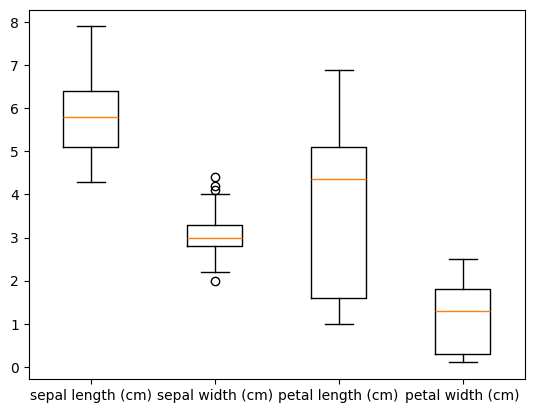

In [36]:
plt.boxplot(mydata.data, tick_labels=mydata.feature_names);

Generemos nuestro primer modelo con un árbol de decisión, que identificamos como DT por decision tree:

In [9]:
modeloDT = DecisionTreeClassifier()   # Incializamos el modelo con los hiperparámetros predeterminados.

clf = modeloDT.fit(X_train, y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

# Podemos observar el desempeño en el conjunto de entrenamieto para verificar
# el subentrenamiento o sobreentrenamiento, pero no para evaluar el modelo en sí:
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(X_train, y_train))

# Así, el conjunto con el que nos interesa evaluar el desempeño es con los de validación,
# así que calculamos primero sus predicciones y después las usamos para evaluar el modelo:

predi = clf.predict(X_val)     # Obtenemos predicciones de 0s, 1s o 2s para cada clase

print('Exactitud en el conjunto de validación: %.2f' % clf.score(X_val, y_val))

Exactitud en el conjunto de entrenamiento: 1.00
Exactitud en el conjunto de validación: 0.97


Observamos que se obtuvo una clasificación perfecta en el conjunto de entrenamiento y en el de validación un error del $3\%$. Esto nos permite decir que tenemos un buen modelo para empezar, ya que la diferencia entre ambos resultados podemos decir que es aceptable.

Pero veamos la matriz de confusión que nos dice cómo se está equivocando este clasificador:

In [10]:
print(confusion_matrix(y_val, predi))     # (renglones, columnas)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]


Hay que recordar que el acomodo de renglones y columnas en la matriz de confusión está determinado por la manera en que acomodas la información en la función confusion_matrix().

Recuerda, al calcular confusion_matrix(A,B) con los argumentos A y B, el primer argumento A tendrá sus niveles de clase en los renglones y el segundo argumento, B, tendrá sus niveles en las columnas.

Así, para el caso que usamos en la celda anterior, confusion_matrix(y_val, predi), en los renglones estarán los niveles "y_val", que son los de las clases reales. Y en la columnas tendremos los niveles de "predi", que son los de las predicciones.

Además, los niveles quedan ordenados numéricamente de manera ascendente.

En general, en el resto del curso estaré usando los valores reales en los renglones y las predicciones en las columnas. Sin embargo, recuerda que esto no es universal y hay analistas que los ponen al revés. Obviamente sigue siendo correcto, pero la interpretación es diferente.

Por ejemplo, veamos la salida colocando los argumentos de la función confusion_matrix en orden contrario a lo mostrado previamente:

In [11]:
print(confusion_matrix(predi, y_val))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


Observa que es la misma información, pero reflejados con respecto a la diagonal principal.

Sin embargo, aunque el acomodo de los valores en la matriz de confusión es diferente, las conclusiones son las mismas. Por ejemplo, que el clasificador se equivocó solamente en 1 predicción de las 30 que realizó en el conjunto de validación. Y de hecho, que la manera en que se equivocó fue diciendo que uno de los registros de la clase 2 (virginica) era de la clase 1 (versicolor).

Cuando se tiene una gran cantidad de datos conviene expresar la matriz de confusión con la proporción de las predicciones. En nuestro caso quedaría como sigue (y regresando a usar las etiquetas reales en el primer argumento de la función):

In [12]:
print(confusion_matrix(y_val, predi) / y_val.shape[0])

[[0.3        0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.03333333 0.33333333]]


Es decir, tenemos un $3.33\%$ de error en nuestro clasificador.

También podemos obtener el desempeño del modelo mediante la exactitud (accuracy) como sigue:

In [13]:
clf.score(X_val, y_val)

0.9666666666666667

En es este caso es precisamente el complemento de lo obtenido en la matriz de confusión.

Sin embargo, la normalización de los resultados también la podemos obtener con el argumento "normalize" de confusion_matrix.

Puedes revisar la documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [15]:
confusion_matrix(y_val, predi, normalize='true')  # Normalización por renglones.

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.09090909, 0.90909091]])

In [17]:
confusion_matrix(y_val, predi, normalize='pred')  # Normalización por columnas.

array([[1.        , 0.        , 0.        ],
       [0.        , 0.90909091, 0.        ],
       [0.        , 0.09090909, 1.        ]])

In [18]:
confusion_matrix(y_val, predi, normalize='all')  # Normalización con respecto a todos los datos.

array([[0.3       , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.03333333, 0.33333333]])

### **Gráfico de los árboles de decisión**

Existen varias librerías que nos ayudan a visualizar el resultado de los árboles de decisión. Veamos una manera de hacerlo.


In [19]:
# Nos apoyamos en elmódulo tree de sklearn:
from sklearn import tree
import pydotplus
from IPython.display import Image

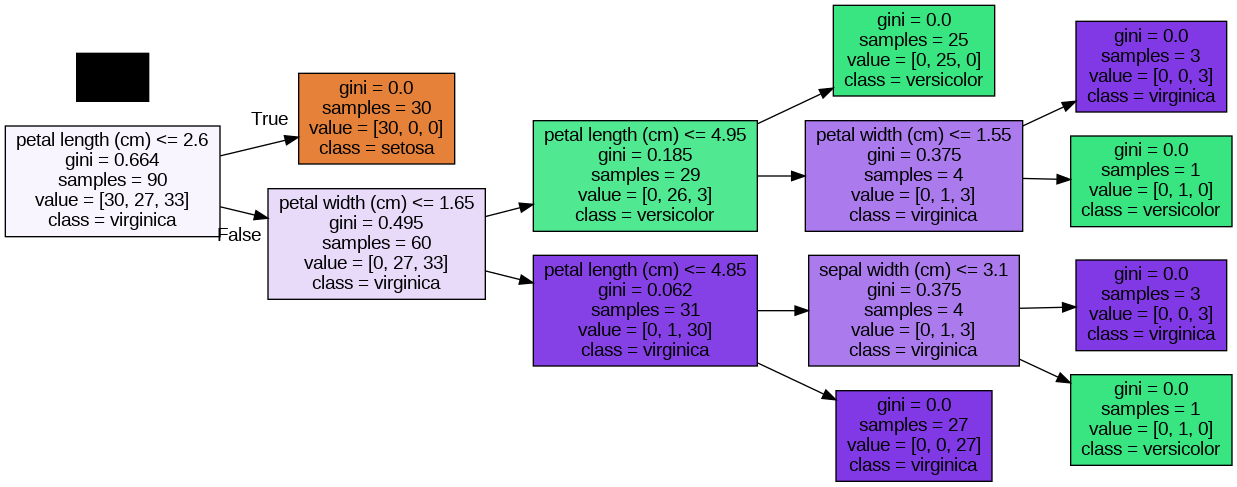

In [21]:
dot_data = tree.export_graphviz(decision_tree=clf,
                                out_file=None,
                                max_depth=None,
                                feature_names=mydata.feature_names,
                                class_names=[mydata.target_names[0], mydata.target_names[1], mydata.target_names[2]],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## **Pruning - Podado y sobreentrenamiento**

###Para aplicar Pruning y evitar sobre-entrenamiento ajustar al menos los siguientes hiperparámetros de:

*   max_depth : la profunidad del árbol. Entre más grande, mayor sobreentrenamiento.

*   min_samples_split : cantidad mínima de observaciones que debe haber en un nodo para continuar con la división. Menor valor, mayor sobreentrenamiento.

*   min_samples_leaf : cantidad mínima de observaciones que deben quedar en cada hoja del árbol de decisión final. Menor cantidad, mayor sobreentrenamiento.

*   ccp_alpha: parámetro para evitar el sobreentrenamiento, que se comporta de manera análoga al parámetro de regularización $L_1$ estudiado previamente. Mayor valor, mayor cantidad de podado (pruning).

# **Parte - 2: Bosque Aleatorio (Random Forest)**

El bosque aleatorio igualmente puede aplicarse a modelos de regresión y clasificación:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Para este caso simulemos un problema de clasificación con funciones que hemos usado previamente.

In [22]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.datasets

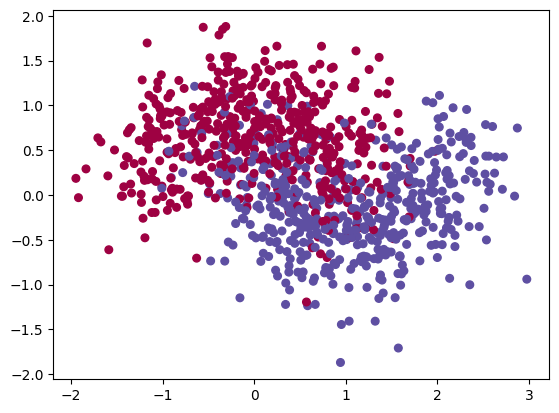

In [23]:
N=1000  # total de datos a generar en la muestra.
noisy_data = sklearn.datasets.make_moons(n_samples=N, noise=0.4, random_state=17)
X, Y = noisy_data

plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Spectral);

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.4, shuffle=True, random_state=17)

mimodelo = RandomForestClassifier()

clf = mimodelo.fit(Xtrain,Ytrain)

results = clf.predict(Xtest)

confusion_matrix(Ytest, results)

array([[168,  34],
       [ 31, 167]])

In [25]:
clf.score(Xtest,Ytest)  # es la Exactitud (accuracy)

0.8375

### **En los árboles de decisión y bosque aleatorio podemos obtener además la importancia de cada factor en el modelo obtenido:**

In [26]:
clf.feature_importances_   # Recuerda que mayor magnitud de un factor, implica su mayor importancia.

array([0.45652715, 0.54347285])

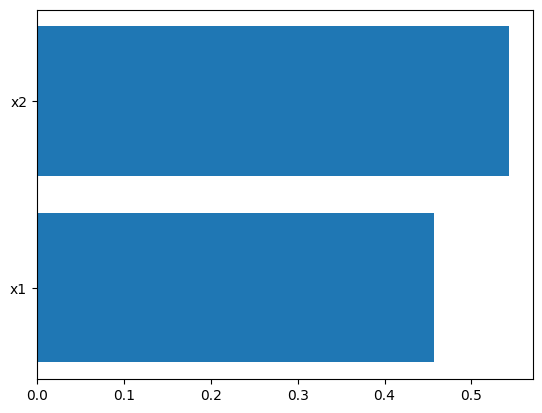

In [27]:
plt.barh(['x1','x2'], width=clf.feature_importances_);

In [33]:
## Algunos de lo hiperparámetros del clasificador bosque aleatorio.
## Los modelos basados en árboles tienen una gran cantidad de argumentos,
## poco a poco puedes irte familiarizando con ellos:

mimodelo2 = RandomForestClassifier(n_estimators=10,  # número de árboles en el Forest y después promedia por votación.
                                   criterion='gini',   # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
                                   max_depth=2, # Depth=k : máximo 2^k líneas/ramas.
                                   min_samples_split = 6,  # mínimo de puntos muestrales requeridos en un nodo para hacer la ramificación. Puede ser fracción de 0 a 1.
                                   min_samples_leaf = 4,  # mínimo de puntos muestrales que deben quedar en cada nueva ramificación (hojas). Puede ser fracción de 0 a 1.
                                   max_features= 'sqrt',   # número de características (features) que se consideran en cada ramificación: auto=sqrt(n_features).
                                   max_leaf_nodes=16,  # solo nos quedamos con las mejores k hojas.
                                   bootstrap=True,  # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
                                   oob_score=False,  # True, en caso de utilizar Out-of-bag samples.
                                   verbose=0,     # tipo de despliega de información durante el entrenamiento.
                                   n_jobs=-1,    # total de hilos a usar en las rutinas paralelizables: "-1" :usar todos los posibles.
                                   max_samples=None,   # Cuando se usa Boostrap, es el total de datos de Xtrain a usar en cada árbol. "None" usará Xtrain[0].
                                   random_state=19)

In [34]:
clf2 = mimodelo2.fit(Xtrain,Ytrain)
clf2.score(Xtest,Ytest)

0.855

### **Fin de los ejemplos de la semana 6**